# Assignment 2 - Student Stress

### Author: Lithabo Mabala

### Student Number: 221099934

### Date: 14 April 2024

### Source: Kaggle

### GitHub url: https://github.com/LethaboPat/Lithabo_Mabala_22109934_Student_Stress

<h1><b><p style=font-family:tahoma;font-size:100%;color:black;text-align:center;border-radius:40px 50px; padding:10px; border:solid 2px #09375b; box-shadow: 5px 5px 5px #042b4c"> Python Libraries</p></b></h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gmean
from scipy.stats import kurtosis
import statsmodels.api as sm
from pandas.plotting import parallel_coordinates

import warnings
warnings.filterwarnings("ignore") # Disable all warnings

<h2><b><span style="color:#FF0000"> | </span><span style="color:#9b006e">Data Description</span></b></h2>

|Feature|Explain|
|-------|-------|
|Anxiety level:| How worried or nervous you feel.|
|Self esteem: |How much you value yourself.|
|Mental health history:| Past experiences with mental health conditions.|
|Depression:| A feeling of sadness or hopelessness that lasts for a long time.|
|Headache:| Pain in your head.|
|Blood pressure:| The force of blood pushing against the walls of your arteries.|
|Sleep quality:| How well you sleep at night.|
|Breathing problem:| Difficulty catching your breath.|
|Noise level:| How loud the sounds around you are.|
|Living conditions:| The quality of your home environment.|
|Safety:| Feeling secure from harm.|
|Basic needs:| Having enough food, water, shelter, and sleep.|
|Academic performance:| How well you do in school.|
|Study load:| The amount of work you have to do for school.|
|Teacher-student relationship:| How you get along with your teachers.|
|Future career concerns:| Worries about your future job and path.|
|Social support:| Having people who care about you and you can rely on.|
|Peer pressure:| Feeling pressured to do something you don't want to do by your peers.|
|Extracurricular activities:| Activities you do outside of school hours.|
|Bullying:| Being unkind or aggressive to someone repeatedly.|
|Stress level:| How overwhelmed or pressured you feel.|

<a id="config"></a>
<h2><b><span style="color:#FF0000"> | </span><span style="color:#9b006e">Loading Data</span></b></h2>

In [4]:
stu_stress= pd.read_csv('StressLevelDataset.csv')
stu_stress.head(10).style.hide(axis="index")

anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1
20,13,1,21,3,3,1,4,3,2,2,1,2,5,2,5,1,4,4,5,2
4,26,0,6,1,2,4,1,1,4,4,4,5,1,4,1,3,2,2,1,0
17,3,1,22,4,3,1,5,3,1,1,1,1,3,2,4,1,4,4,5,2
13,22,1,12,3,1,2,4,3,3,3,3,3,3,2,3,3,3,2,2,1
6,8,0,27,4,3,1,2,0,5,2,2,2,2,1,5,1,5,3,4,1


<a id="config"></a>
<h2><b><span style="color:#FF0000"> Step 1.2 | </span><span style="color:#9b006e">Data Information</span></b></h2>

In [5]:
stu_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

<a id="config"></a>
<h2><b><span style="color:#FF0000"> Step 1.2 | </span><span style="color:#9b006e">Data Information</span></b></h2>

In [8]:
stu_stress.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

<div style="background-color: #faedfa; padding: 10px; border-radius: 5px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h3 style="text-align: center; color: #333;">There are no missing values</h3>
</div>

<img src="https://gifdb.com/images/high/parks-and-recreation-amy-poehler-love-it-37qvmblhmgkczhlr.gif">

<a id="config"></a>
<h2><b><span style="color:#FF0000">  | </span><span style="color:#9b006e">Descriptive Analysis </span></b></h2>

In [7]:
stu_stress.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.000000,11.063636,6.117558,0.000000,6.000000,11.000000,16.000000,21.000000
self_esteem,1100.000000,17.777273,8.944599,0.000000,11.000000,19.000000,26.000000,30.000000
mental_health_history,1100.000000,0.492727,0.500175,0.000000,0.000000,0.000000,1.000000,1.000000
depression,1100.000000,12.555455,7.727008,0.000000,6.000000,12.000000,19.000000,27.000000
headache,1100.000000,2.508182,1.409356,0.000000,1.000000,3.000000,3.000000,5.000000
blood_pressure,1100.000000,2.181818,0.833575,1.000000,1.000000,2.000000,3.000000,3.000000
sleep_quality,1100.000000,2.660000,1.548383,0.000000,1.000000,2.500000,4.000000,5.000000
breathing_problem,1100.000000,2.753636,1.400713,0.000000,2.000000,3.000000,4.000000,5.000000
noise_level,1100.000000,2.649091,1.328127,0.000000,2.000000,3.000000,3.000000,5.000000
living_conditions,1100.000000,2.518182,1.119208,0.000000,2.000000,2.000000,3.000000,5.000000


<a id="config"></a>
<h2><b><span style="color:#FF0000"> | </span><span style="color:#9b006e">Descriptive Analysis </span></b></h2>

In [19]:
geometric_mean = stu_stress.apply(gmean)
variance = np.var(stu_stress)
kurtosis = stu_stress.kurtosis()
skewness = stu_stress.skew()
range_val = stu_stress.max() - stu_stress.min()

In [20]:
basic_stats_df = pd.DataFrame({'Geometric Mean': geometric_mean, 'Sample Variance': variance,
                               'Kurtosis': kurtosis, 'Skewness': skewness, 'Range': range_val})
basic_stats_df

,Geometric Mean,Sample Variance,Kurtosis,Skewness,Range
anxiety_level,0.000000,37.390496,-1.094132,-0.082612,21
self_esteem,0.000000,79.933120,-1.061830,-0.396539,30
mental_health_history,0.000000,0.249947,-2.002796,0.029134,1
depression,0.000000,59.652379,-0.988845,0.216638,27
headache,0.000000,1.984479,-0.996594,0.270494,5
blood_pressure,1.990547,0.694215,-1.474031,-0.351186,2
sleep_quality,0.000000,2.395309,-1.322049,0.177975,5
breathing_problem,0.000000,1.960214,-1.060044,-0.001625,5
noise_level,0.000000,1.762317,-0.695764,0.207122,5
living_conditions,0.000000,1.251488,-0.496917,0.018794,5


<a id="config"></a>
<h2><b><span style="color:#FF0000">  | </span><span style="color:#9b006e">Z scores </span></b></h2>

In [26]:
def z_scores(x):
    return (x - x.mean()) / x.std()

zscore = stu_stress.apply(z_scores)
zscore.head(20).style.hide(axis="index")

anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0.479989,0.248499,-0.985111,-0.201301,-0.360577,-1.417771,-0.426251,0.889806,-0.488727,0.430499,0.186839,-0.538951,0.160663,-0.472585,0.254098,0.229446,0.112788,0.186249,0.164174,-0.403194,0.004426
0.643453,-1.093092,1.014191,0.316364,1.768055,0.981534,-1.072086,0.889806,0.264214,-1.356479,-0.524312,-0.538951,-1.253171,1.047425,-1.190385,1.537169,-0.841569,0.887873,1.575047,1.556364,1.221455
0.153062,0.024901,1.014191,0.186948,-0.360577,-1.417771,-0.426251,-0.538038,-0.488727,-0.462990,0.186839,-0.538951,-0.546254,0.287420,0.254098,-0.424416,0.112788,0.186249,-0.541262,-0.403194,0.004426
0.806917,-0.645895,1.014191,0.316364,1.058511,0.981534,-1.072086,0.175884,1.017154,-0.462990,-0.524312,-0.538951,-0.546254,1.047425,-1.190385,0.883308,-0.841569,0.887873,0.869611,1.556364,1.221455
0.806917,1.142894,-0.985111,-0.718966,-0.360577,0.981534,1.511254,-1.251960,0.264214,-0.462990,0.897990,0.158515,0.867580,0.287420,-1.190385,-0.424416,-0.841569,1.589497,-1.952135,1.556364,0.004426
1.460773,-0.534096,1.014191,1.092861,0.348967,0.981534,-1.072086,0.889806,0.264214,-0.462990,-0.524312,-1.236418,-0.546254,1.807430,-0.468144,1.537169,-0.841569,0.887873,0.869611,1.556364,1.221455
-1.154650,0.919295,-0.985111,-0.848382,-1.070121,-0.218119,0.865419,-1.251960,-1.241667,1.323988,0.897990,0.855981,1.574496,-1.232590,0.976339,-1.078277,1.067144,-0.515375,-0.541262,-1.056380,-1.212604
0.970381,-1.652089,1.014191,1.222277,1.058511,0.981534,-1.072086,1.603728,0.264214,-1.356479,-1.235463,-1.236418,-1.253171,0.287420,-0.468144,0.883308,-0.841569,0.887873,0.869611,1.556364,1.221455
0.316526,0.472098,1.014191,-0.071885,0.348967,-1.417771,-0.426251,0.889806,0.264214,0.430499,0.186839,0.158515,0.160663,0.287420,-0.468144,0.229446,1.067144,0.186249,-0.541262,-0.403194,0.004426
-0.827722,-1.093092,-0.985111,1.869358,1.058511,0.981534,-1.072086,-0.538038,-1.994607,2.217477,-0.524312,-0.538951,-0.546254,-0.472585,-1.190385,1.537169,-0.841569,1.589497,0.164174,0.903178,0.004426


<a id="config"></a>
<h2><b><span style="color:#FF0000">| </span><span style="color:#9b006e">Visualisation </span></b></h2>

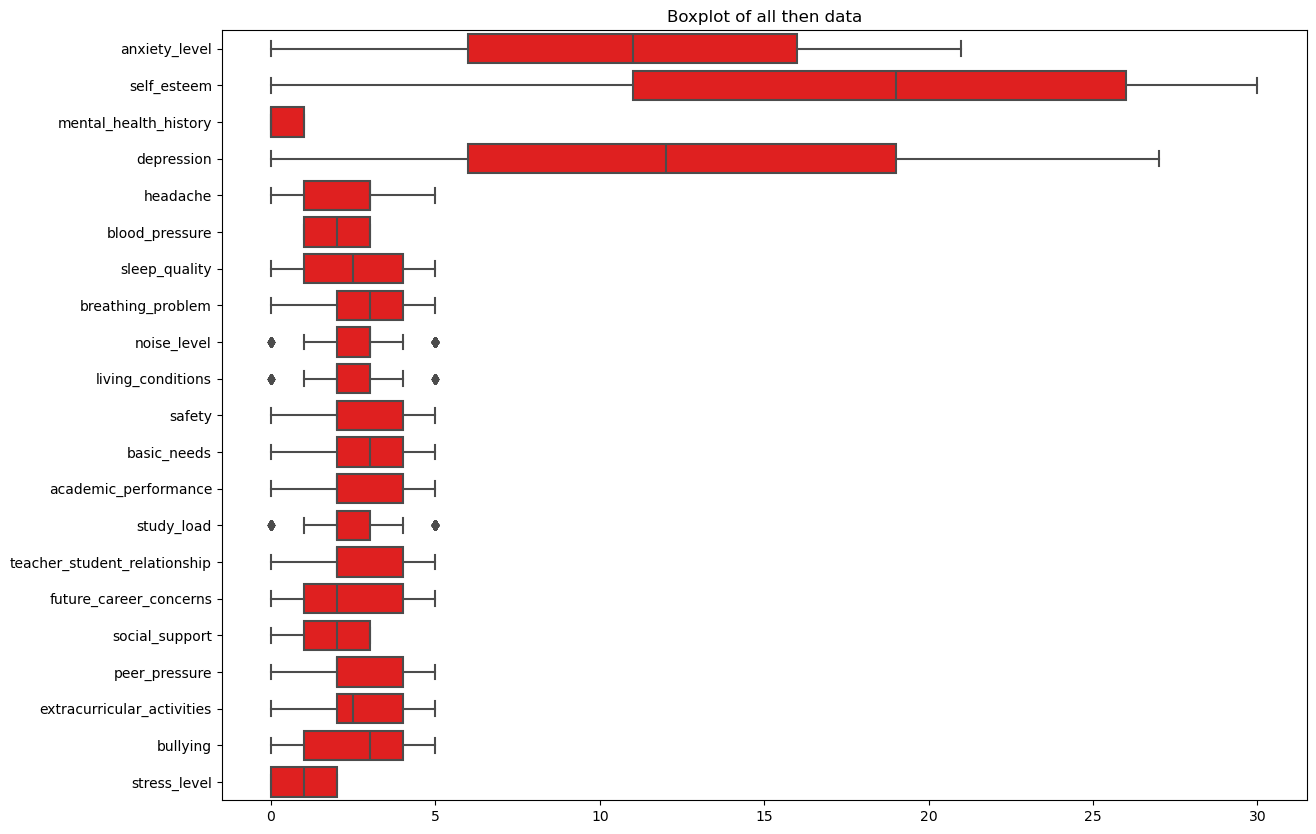

In [88]:
plt.figure(figsize = (14,10))
sns.boxplot(data= stu_stress,orient='h', color= 'red')
plt.title ('Boxplot of all then data')
plt.show()

Text(0.5, 0.01, '33.9%\n33.5%\n32.5%')

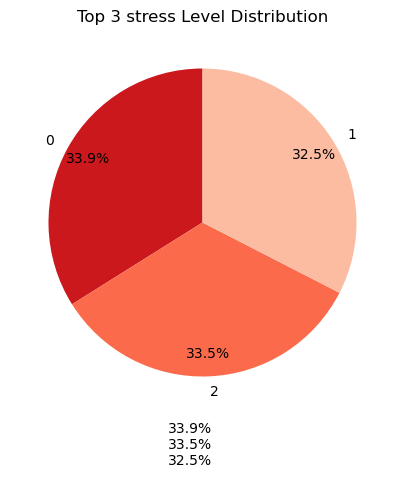

In [37]:
plt.figure(figsize=(10, 5))

# Pie chart
stress_counts = stu_stress['stress_level'].value_counts()
wedges, texts, autotexts = plt.pie(stress_counts, labels=stress_counts.index, colors=sns.color_palette('Reds_r', len(stress_counts)), autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Top 3 stress Level Distribution')

# Add percentage annotations below the diagram
percentages = [f'{p:.1f}%' for p in stress_counts / stress_counts.sum() * 100]
plt.figtext(0.5, 0.01, '\n'.join(percentages), ha='center')

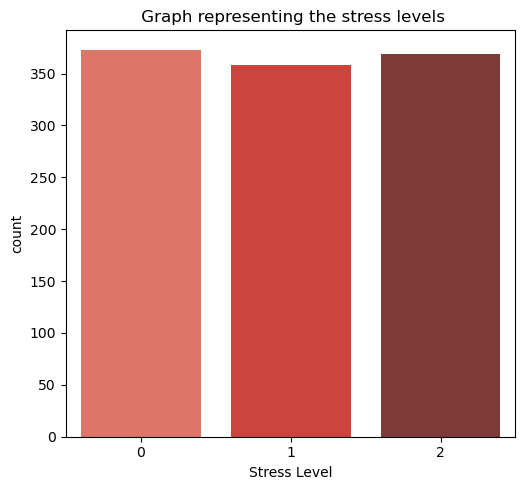

In [59]:
# Count plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.countplot(data=stu_stress, x='stress_level', palette='Reds_d')
plt.title(' Graph representing the stress levels')
plt.xlabel('Stress Level')

plt.tight_layout()
plt.show()

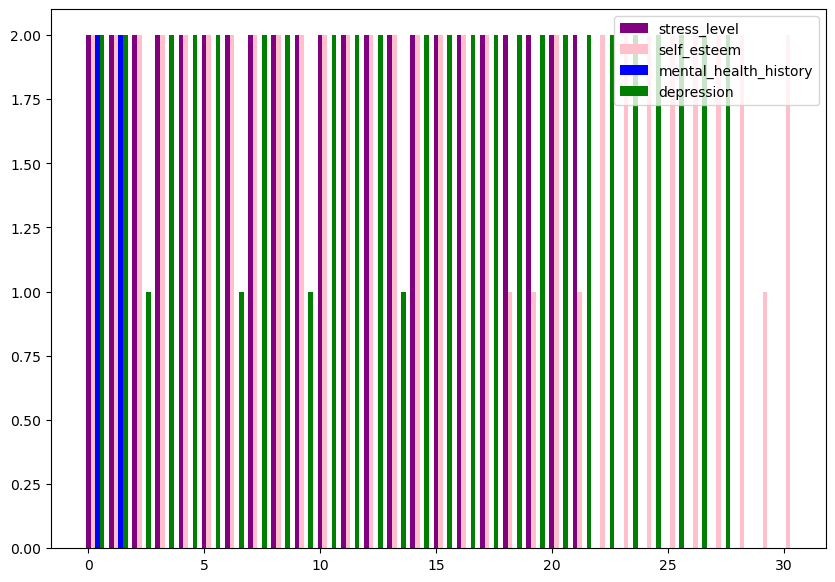

In [62]:
plt.figure(figsize=(10,7))
barWidth= 0.2
plt.bar(stu_stress['anxiety_level'], color='purple',height= stu_stress['stress_level'] ,width=barWidth,label='stress_level')
plt.bar(stu_stress['self_esteem']+0.2, color='pink',height= stu_stress['stress_level'] ,width=barWidth,label='self_esteem')
plt.bar(stu_stress['mental_health_history']+0.4, color='blue',height= stu_stress['stress_level'] ,width=barWidth,label='mental_health_history')
plt.bar(stu_stress['depression']+0.6, color='green',height= stu_stress['stress_level'] ,width=barWidth,label='depression')

plt.legend()

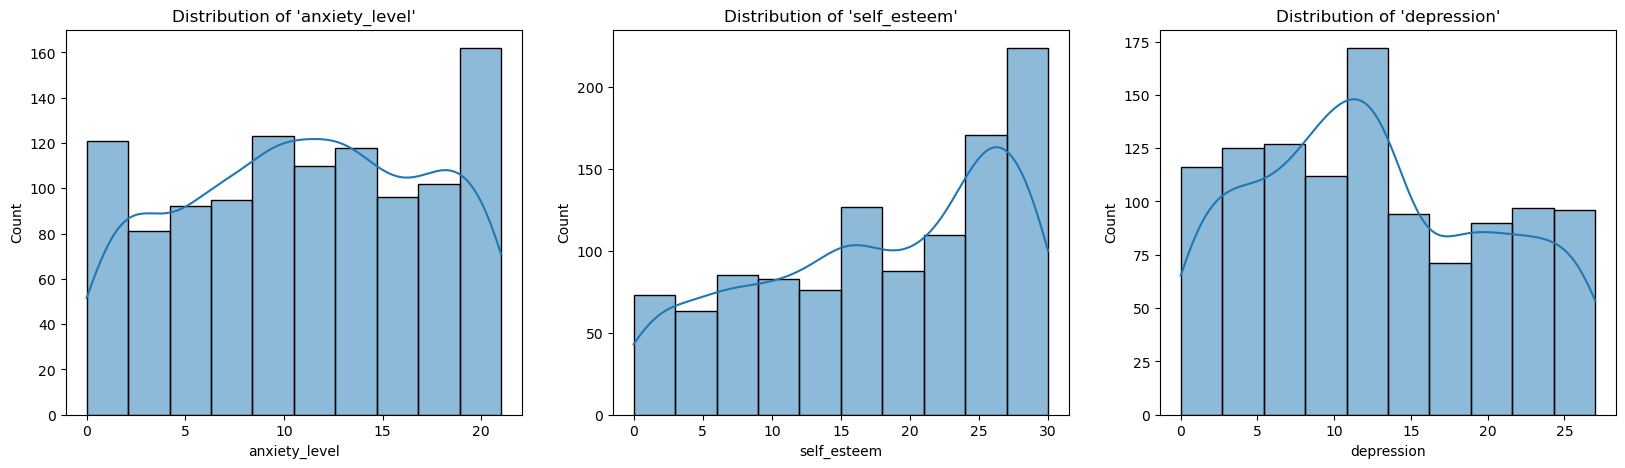

In [67]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(x=stu_stress["anxiety_level"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'anxiety_level'")

plt.subplot(1, 3, 2)
sns.histplot(x=stu_stress["self_esteem"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'self_esteem'")

plt.subplot(1, 3, 3)
sns.histplot(x=stu_stress["depression"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'depression'")


plt.show()

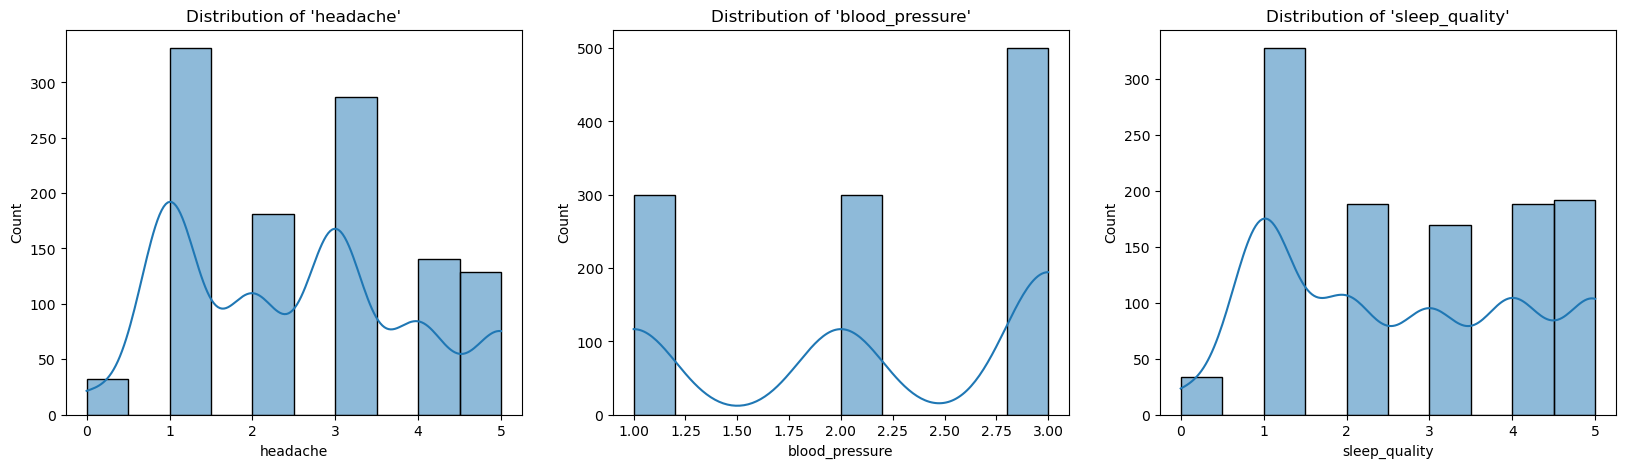

In [69]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=stu_stress["headache"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'headache'")

plt.subplot(1, 3, 2)
sns.histplot(x=stu_stress["blood_pressure"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'blood_pressure'")

plt.subplot(1, 3, 3)
sns.histplot(x=stu_stress["sleep_quality"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'sleep_quality'")
plt.show()

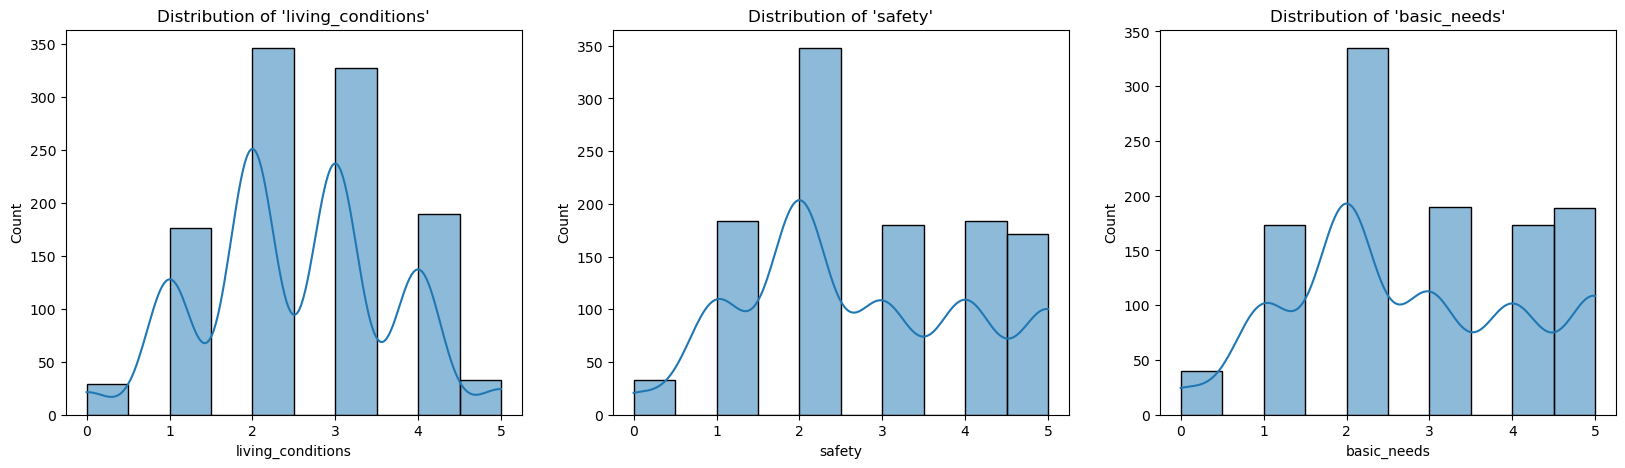

In [70]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=stu_stress["living_conditions"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'living_conditions'")

plt.subplot(1, 3, 2)
sns.histplot(x=stu_stress["safety"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'safety'")

plt.subplot(1, 3, 3)
sns.histplot(x=stu_stress["basic_needs"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'basic_needs'")
plt.show()



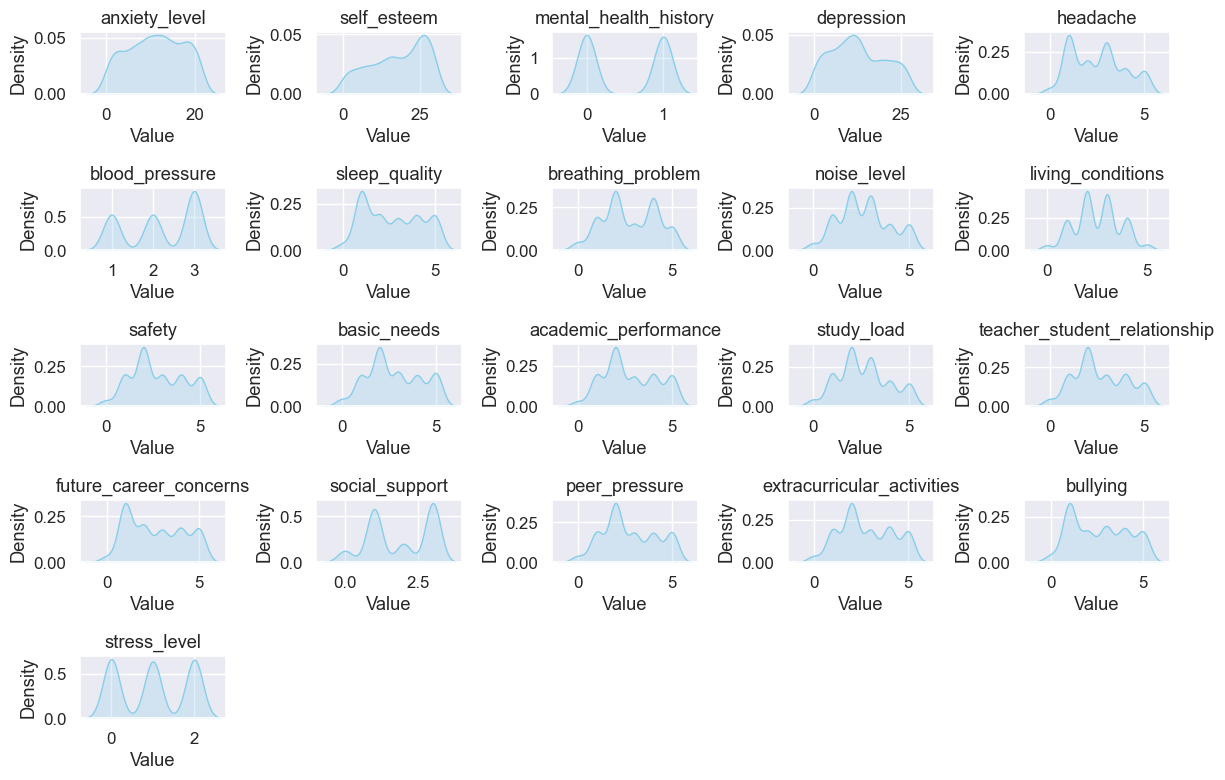

In [17]:
# Density plots of numerical variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(stu_stress.columns, 1):
    plt.subplot(5, 5, i)
    sns.kdeplot(stu_stress[column], color='skyblue', shade=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

<a id="config"></a>
<h2><b><span style="color:#FF0000">| </span><span style="color:#9b006e">Correlation Matrix </span></b></h2>

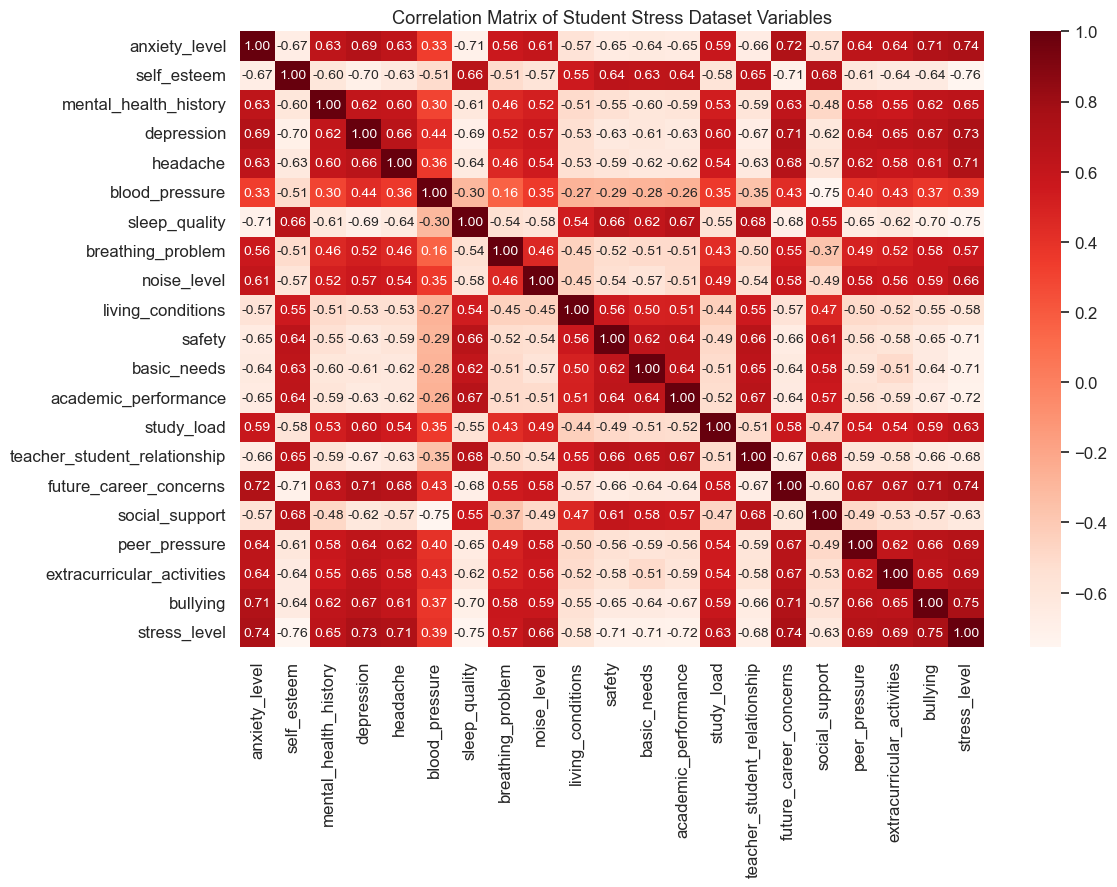

In [9]:
def correlation(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    
    return numerator / denominator

# Calculate the correlation matrix using the pearson_correlation function
correlation_matrix = stu_stress.apply(lambda x: stu_stress.apply(lambda y: correlation(x, y)))
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Student Stress Dataset Variables')
plt.show()


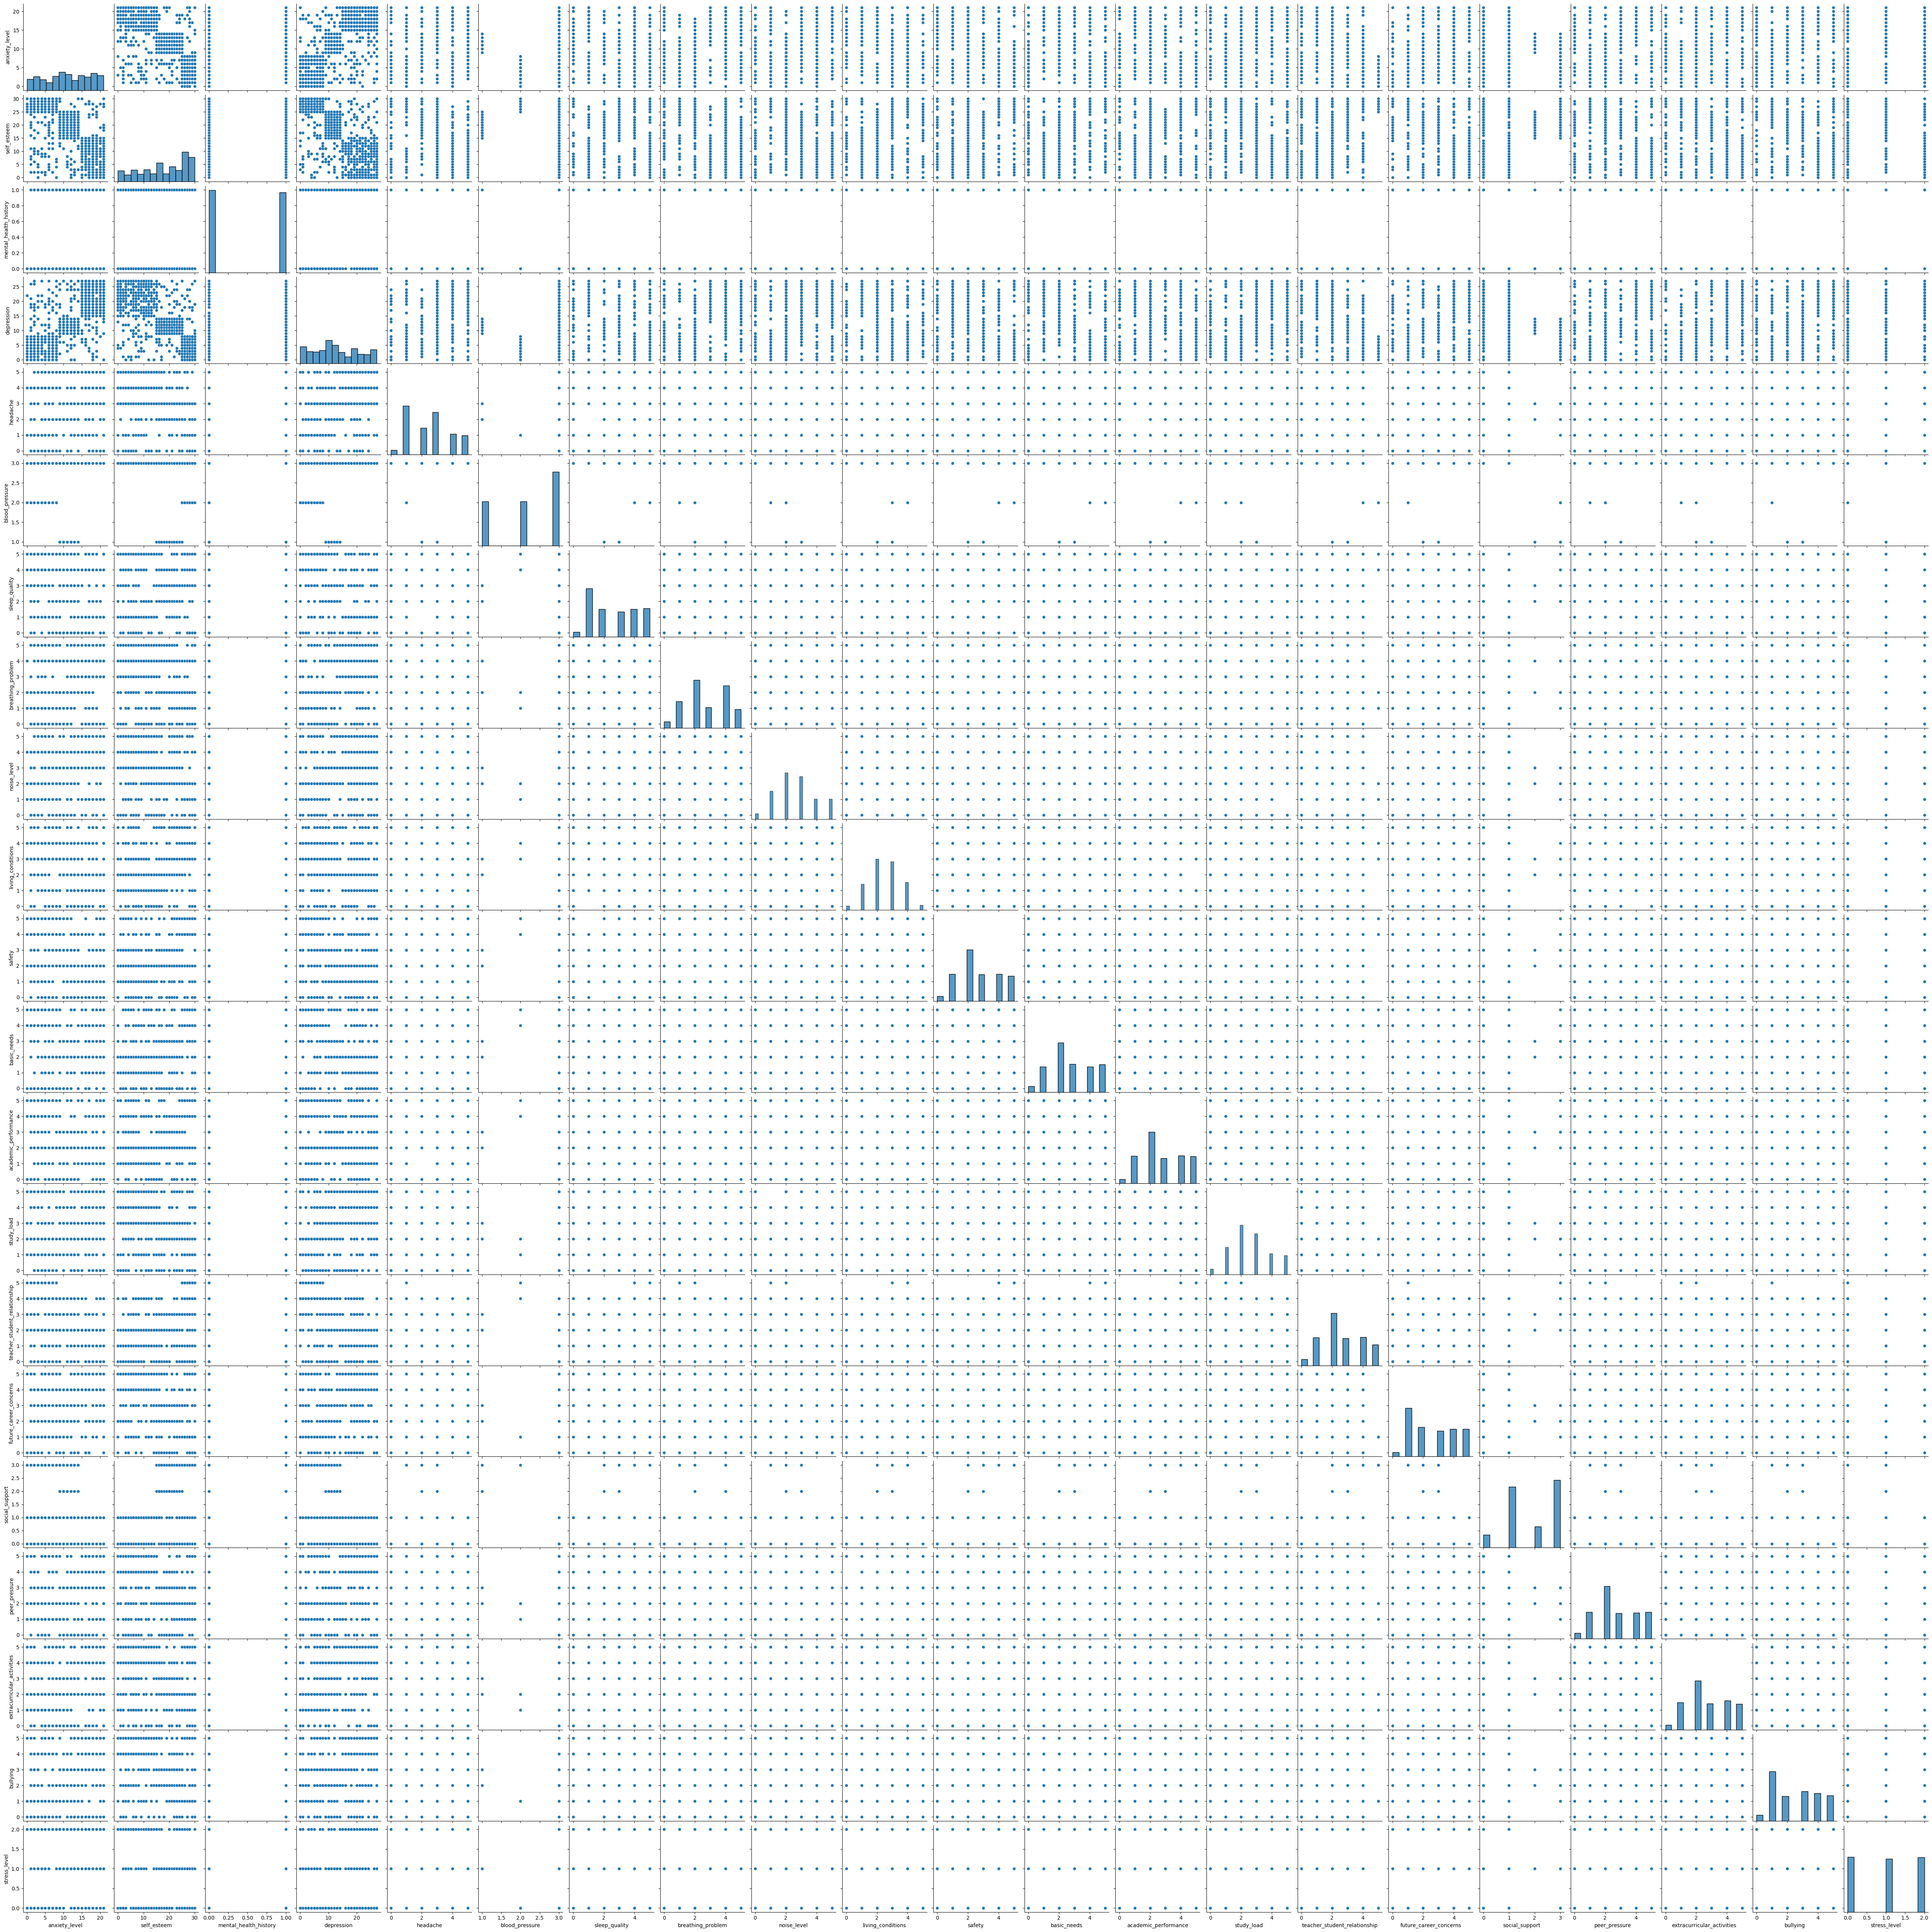

In [72]:
sns.pairplot(stu_stress)

<h2><b><span style="color:#FF0000"> | </span><span style="color:#9b006e">Covariance</span></b></h2>

In [101]:
stu_stress.cov().style.background_gradient('Reds')

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,37.424518,-36.812019,1.941319,32.821764,5.455348,1.687236,-6.728116,4.812780,4.945008,-3.891968,-5.602010,-5.587890,-5.621557,4.717446,-5.617264,6.708429,-3.652163,5.605625,5.558954,6.649491,3.703598
self_esteem,-36.812019,80.005852,-2.699983,-48.352970,-7.892171,-3.837538,9.178071,-6.396141,-6.785235,5.511333,8.099756,8.094921,8.085822,-6.768566,8.086264,-9.747018,6.365828,-7.739797,-8.130135,-8.774129,-5.557681
mental_health_history,1.941319,-2.699983,0.250175,2.380294,0.426356,0.123253,-0.475632,0.325322,0.342305,-0.284672,-0.384533,-0.431136,-0.414757,0.350295,-0.407020,0.478792,-0.252908,0.413900,0.393210,0.478106,0.266580
depression,32.821764,-48.352970,2.380294,59.706658,7.162421,2.808834,-8.293230,5.655622,5.811106,-4.586541,-6.800249,-6.744437,-6.920961,6.125632,-7.209317,8.349777,-5.003449,6.999265,7.103909,7.876111,4.662622
headache,5.455348,-7.892171,0.426356,7.162421,1.986284,0.425263,-1.393940,0.911481,1.017432,-0.840458,-1.167548,-1.259285,-1.240177,1.006737,-1.221414,1.464202,-0.846166,1.250582,1.163871,1.315691,0.826235
blood_pressure,1.687236,-3.837538,0.123253,2.808834,0.425263,0.694847,-0.387625,0.189511,0.390520,-0.256266,-0.337993,-0.335346,-0.309868,0.382745,-0.406403,0.553396,-0.657292,0.476880,0.503681,0.472744,0.269998
sleep_quality,-6.728116,9.178071,-0.475632,-8.293230,-1.393940,-0.387625,2.397489,-1.174832,-1.185842,0.927934,1.431975,1.378526,1.470428,-1.124149,1.452611,-1.615323,0.899727,-1.432466,-1.367643,-1.657998,-0.953012
breathing_problem,4.812780,-6.396141,0.325322,5.655622,0.911481,0.189511,-1.174832,1.961998,0.854325,-0.703888,-1.022929,-1.020556,-1.005087,0.790275,-0.967555,1.168247,-0.535967,0.983678,1.026325,1.235924,0.660614
noise_level,4.945008,-6.785235,0.342305,5.811106,1.017432,0.390520,-1.185842,0.854325,1.763921,-0.672413,-1.002195,-1.089834,-0.965175,0.862622,-0.990720,1.168834,-0.684821,1.105127,1.061117,1.190416,0.723928
living_conditions,-3.891968,5.511333,-0.284672,-4.586541,-0.840458,-0.256266,0.927934,-0.703888,-0.672413,1.252626,0.886947,0.807594,0.803044,-0.644619,0.851261,-0.967226,0.547192,-0.800447,-0.818331,-0.944354,-0.534966


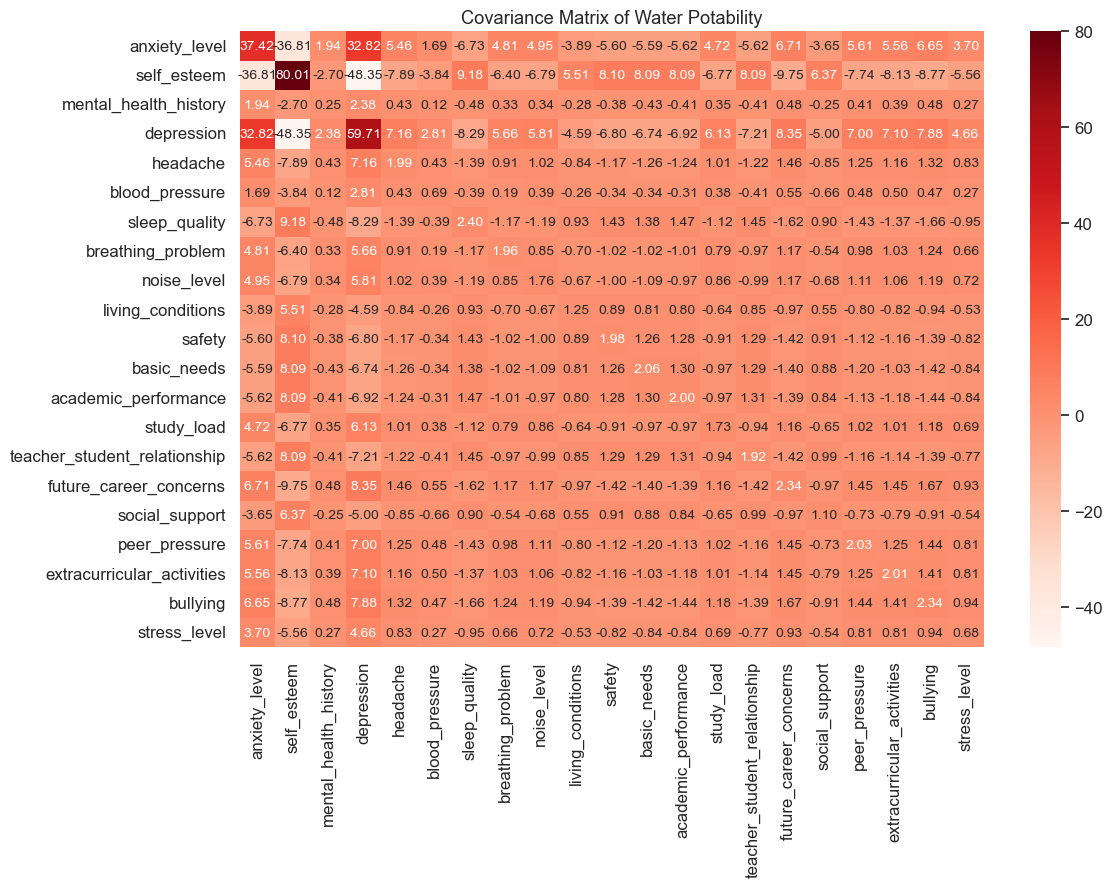

In [21]:
def covariance(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    n = len(x)

    return np.sum((x - x_mean) * (y - y_mean)) / (n - 1)

# Calculate the covariance matrix using the covariance function
covariance_matrix = stu_stress.apply(lambda x: stu_stress.apply(lambda y: covariance(x, y)))
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(covariance_matrix, annot=True, cmap='Reds', fmt='.2f', annot_kws={"size": 10})
plt.title('Covariance Matrix of Water Potability')
plt.show()

<h2><b><span style="color:#FF0000"> | </span><span style="color:#9b006e">Correlation</span></b></h2>

In [106]:
stu_stress.corr().style.background_gradient('Reds')

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.000000,-0.672745,0.634450,0.694340,0.632738,0.330867,-0.710292,0.561654,0.608624,-0.568434,-0.651220,-0.637079,-0.649601,0.586064,-0.663176,0.717016,-0.569748,0.642910,0.641022,0.709982,0.736795
self_esteem,-0.672745,1.000000,-0.603502,-0.699602,-0.626058,-0.514692,0.662693,-0.510514,-0.571169,0.550535,0.643981,0.631212,0.639045,-0.575112,0.652934,-0.712520,0.679211,-0.607118,-0.641202,-0.640737,-0.756195
mental_health_history,0.634450,-0.603502,1.000000,0.615882,0.604826,0.295617,-0.614146,0.464347,0.515290,-0.508525,-0.546731,-0.601196,-0.586193,0.532267,-0.587728,0.625909,-0.482560,0.580602,0.554576,0.624366,0.648644
depression,0.694340,-0.699602,0.615882,1.000000,0.657700,0.436084,-0.693161,0.522540,0.566250,-0.530351,-0.625857,-0.608776,-0.633174,0.602498,-0.673853,0.706561,-0.617972,0.635544,0.648551,0.665790,0.734379
headache,0.632738,-0.626058,0.604826,0.657700,1.000000,0.361986,-0.638771,0.461719,0.543557,-0.532825,-0.589136,-0.623199,-0.622059,0.542890,-0.625928,0.679307,-0.572988,0.622581,0.582562,0.609775,0.713484
blood_pressure,0.330867,-0.514692,0.295617,0.436084,0.361986,1.000000,-0.300323,0.162308,0.352744,-0.274686,-0.288354,-0.280590,-0.262785,0.348964,-0.352123,0.434087,-0.752531,0.401392,0.426254,0.370440,0.394200
sleep_quality,-0.710292,0.662693,-0.614146,-0.693161,-0.638771,-0.300323,1.000000,-0.541687,-0.576645,0.535462,0.657686,0.620955,0.671326,-0.551775,0.677569,-0.682130,0.554553,-0.649098,-0.623092,-0.699427,-0.749068
breathing_problem,0.561654,-0.510514,0.464347,0.522540,0.461719,0.162308,-0.541687,1.000000,0.459235,-0.448997,-0.519348,-0.508172,-0.507251,0.428791,-0.498895,0.545345,-0.365173,0.492729,0.516884,0.576341,0.573984
noise_level,0.608624,-0.571169,0.515290,0.566250,0.543557,0.352744,-0.576645,0.459235,1.000000,-0.452362,-0.536630,-0.572327,-0.513730,0.493625,-0.538758,0.575439,-0.492094,0.583817,0.563614,0.585458,0.663371
living_conditions,-0.568434,0.550535,-0.508525,-0.530351,-0.532825,-0.274686,0.535462,-0.448997,-0.452362,1.000000,0.563571,0.503275,0.507221,-0.437732,0.549332,-0.565071,0.466594,-0.501795,-0.515794,-0.551139,-0.581723


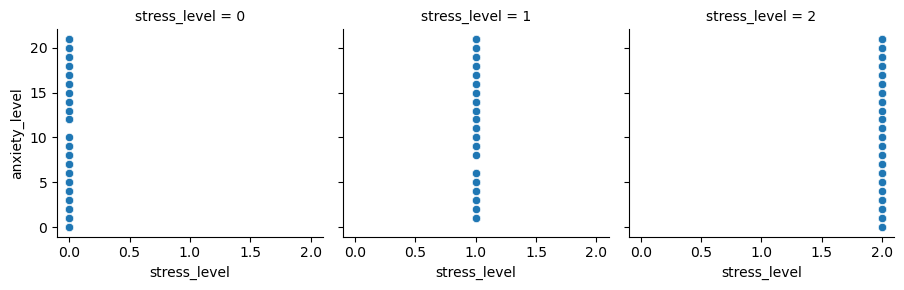

In [79]:
# Pairwise plots for selected features, separated by quality
g = sns.FacetGrid(stu_stress, col="stress_level", col_wrap=4)
g.map(sns.scatterplot, "stress_level", "anxiety_level")
plt.show()

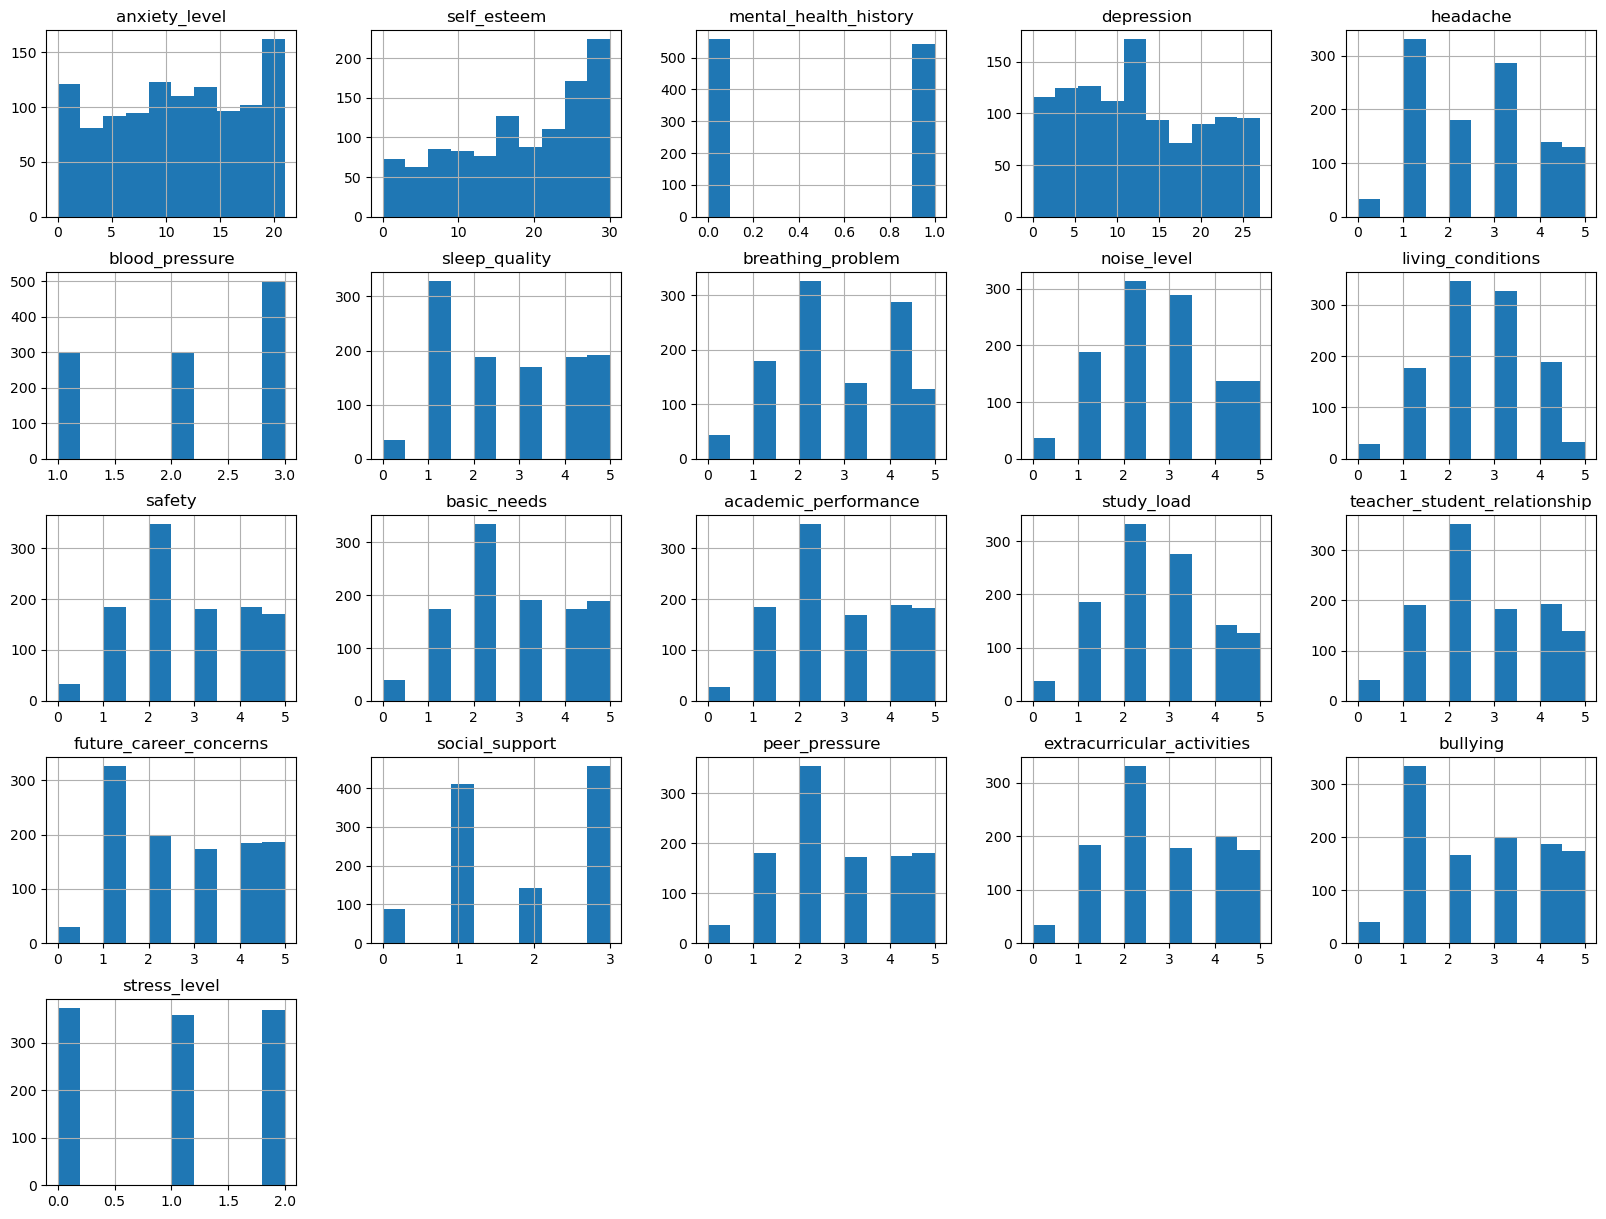

In [80]:
stu_stress.hist(bins=10, figsize=(20, 15))
plt.show()

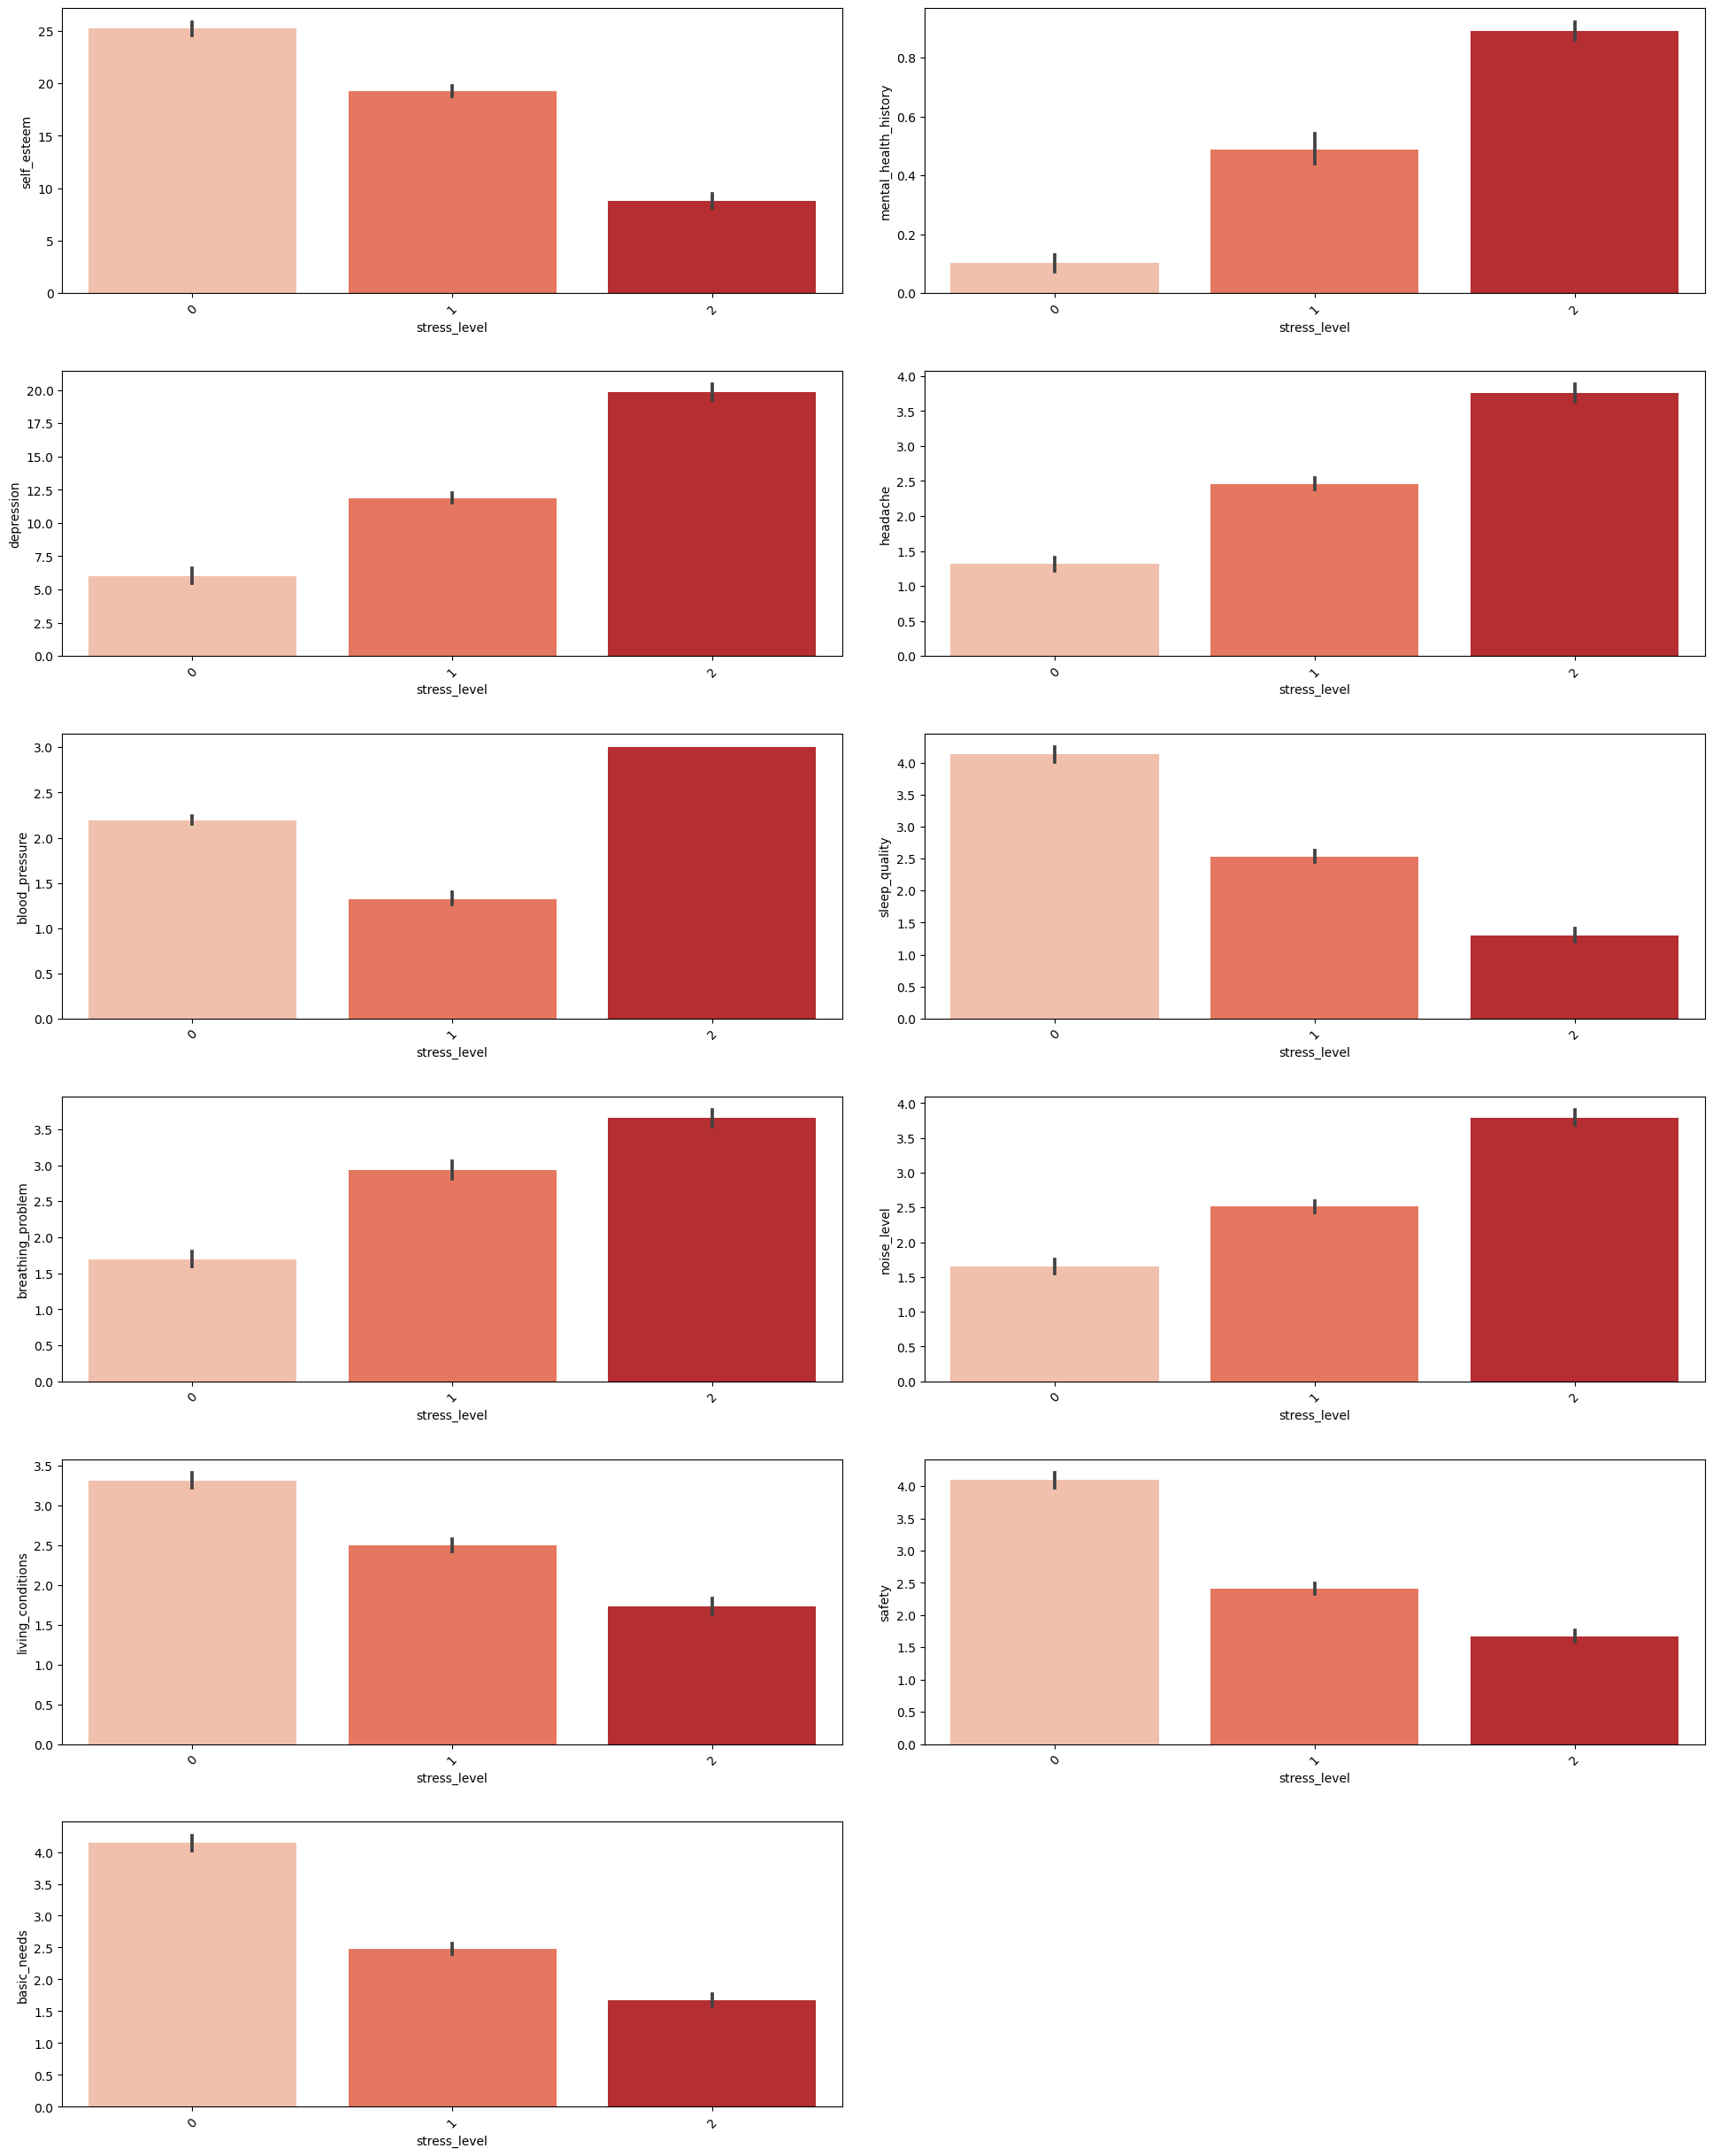

In [81]:
plt.figure(figsize=(20, 25))

# Define the columns to plot
columns = stu_stress.columns[1:]  # Assuming the first column is 'quality'

for i in range(1, 12):
    plt.subplot(6, 2, i)
    sns.barplot(x='stress_level', y=columns[i-1], data=stu_stress, palette='Reds')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout(pad=3.0)  # Increase padding between subplots
plt.show()

<Axes: xlabel='anxiety_level', ylabel='stress_level'>

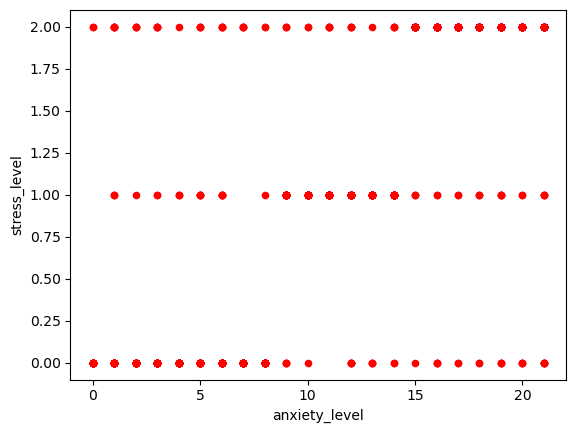

In [89]:
stu_stress.plot(x='anxiety_level', y='stress_level', kind='scatter',color='red')

<a id="import"></a>
<h2><b><span style="color:#FF0000"> </span><span style="color:#9b006e"> Comparative Analysis of Excel and Python for Data Analysis and Descriptive Statistics: Insights and Future Directions</span></b></h2>

Through the process of working on Assignment 1 and Assignment 2, I've developed a nuanced understanding of the contrasts between utilizing Excel and Python for data analytics and performing descriptive statistics. Each platform exhibits its distinct strengths and weaknesses across various analytical tasks.

Excel's intuitive interface stands out for its simplicity in executing data manipulation, visualization, and the computation of basic descriptive statistics without the need for programming knowledge. It shines in scenarios where immediate results are essential, courtesy of its array of built-in functions and features, making it a prime choice for those less acquainted with code. Beyond automated calculations, Excel allows for manual computations, presenting a robust suite of visual tools for crafting coherent workbooks and diverse graph types for effective data representation.

On the other hand Python distinguishes itself with superior flexibility and robustness in data analysis, cleansing, and processing realms. Harnessing the power of libraries like pandas, numpy, and matplotlib, it surpasses Excel in facilitating sophisticated statistical analyses and intricate data visualizations. Python's capability to automate recurring tasks and manage voluminous data sets easily outpaces Excel's functionalities.

Choosing between Excel and Python really boils down to what you're looking to do and how comfy you are with each tool. Excel is your go-to for quick, straightforward jobs or when you're working with folks who prefer a more graphical interface. But if you're facing a mountain of data or need to do some heavy statistical lifting, Python is your best bet.

If I could take another chance at these assignments, I'd love to dive deeper into Python's toolbox and play around with more complex stats to see just how far I can push it compared to Excel. I'm curious to uncover more about what each platform can really do, especially when things get tricky.

<a id="import"></a>
<h2><b><span style="color:#FF0000"> </span><span style="color:#9b006e"> Conclusion from the data</span></b></h2>

In conclusion, exploring the student stress dataset has been an eye-opening experience, demonstrating a complex network of factors that influence student stress levels. It's intriguing to observe how each student's individual experiences, perspectives, and environment influence their stress levels. As I dug through the data, it became evident that stress is not a one-size-fits-all experience; some students cope with high stress levels, while others appear to handle it more easily. This emphasises the necessity of recognising individual variations and comprehending the context in which stresses emerge.

Looking ahead, this work has ignited a personal commitment to advocate for student well-being and create a positive learning environment. While it is not a formal research project, the insights acquired from this assignment have inspired my desire to investigate practical techniques for increasing student resilience and mental health. I am motivated to make a good influence in students' lives, whether by introducing stress-reduction activities or campaigning for improved social support networks. This project has been more than simply a task; it has served as a spark for personal growth and a reminder of my commitment to helping students' complete development.